<a href="https://colab.research.google.com/github/ankit-chuahan/Credit-Card-Fraud-detection-Machine-Learning/blob/main/Credit_card_fraud_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title: Enhancing Financial Security: Credit Card Fraud Detection using Machine Learning**

Project By:-Ankit Chauhan

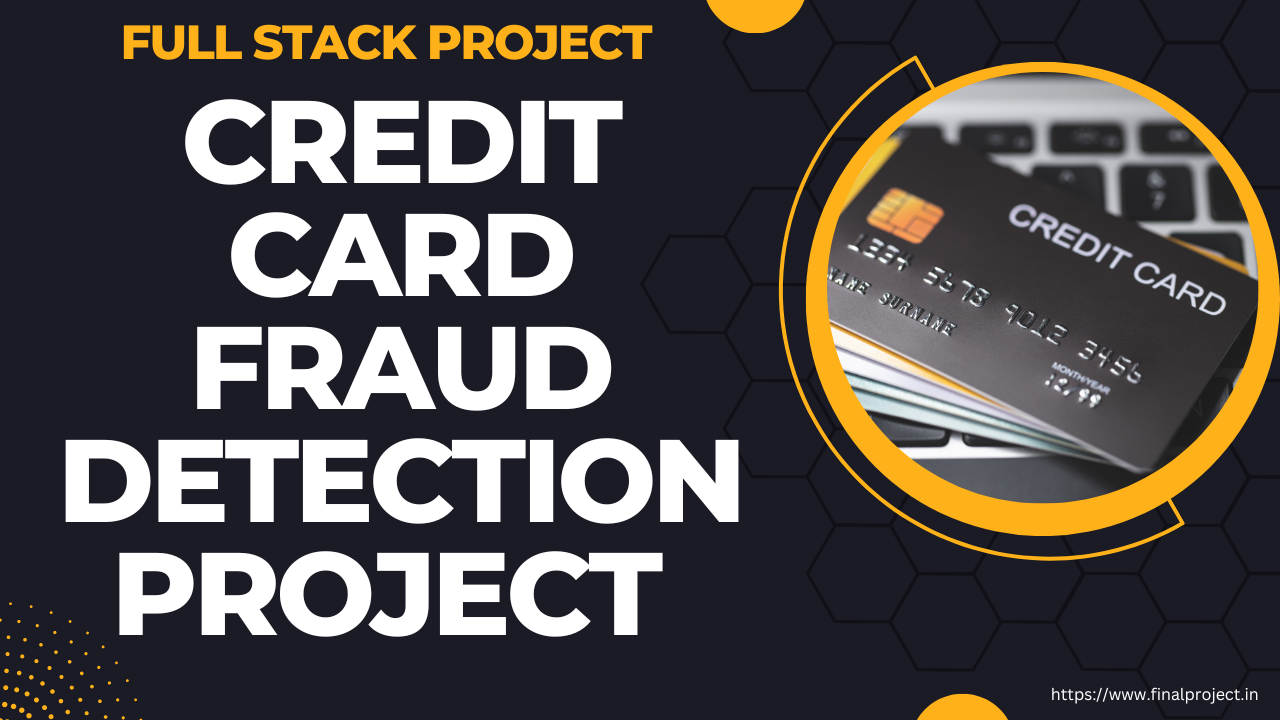

**Project Description**

In today's digital age, financial transactions are increasingly conducted online, making credit card fraud a significant concern for both consumers and financial institutions. To address this challenge, this project introduces a robust machine learning model designed to detect fraudulent transactions promptly and accurately.

**Project Objectives:**

* Develop a machine learning-based credit card fraud detection system.
* Train the system on a large dataset of labeled credit card transactions.
* Evaluate the performance of the system using various metrics.

This project demonstrates the efficacy of machine learning techniques in addressing the pervasive issue of credit card fraud. By leveraging advanced algorithms and robust data processing methodologies, the developed model offers a proactive and effective solution for financial institutions to safeguard against fraudulent activities, ultimately fostering a more secure and trustworthy financial ecosystem.

In [ ]:
# importing require libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# loading dataset to pandas dataframe
credit = pd.read_csv("/content/creditcard.csv")

In [ ]:
# Top 5 rows of dataframe
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
# Bottom 5 rows of datafram
credit.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
51586,45023,-2.943382,-2.332451,2.568959,0.747114,2.083550,-1.319267,-1.837967,0.421285,0.347715,...,-0.013848,-0.091317,-0.268974,0.069693,0.202920,0.356930,-0.006093,0.268288,26.24,0.0
51587,45024,-1.278283,-3.726046,-0.902718,2.796542,-1.750987,0.199763,1.223412,-0.106145,0.793279,...,0.664178,-0.592258,-1.141974,0.322687,0.081328,-0.354449,-0.150956,0.269036,1233.16,0.0
51588,45024,-0.852261,0.886192,-0.378032,-1.142044,1.880941,3.505875,-0.403582,1.365218,-0.369193,...,0.091829,0.066337,-0.055970,1.027545,-0.327900,0.255778,0.132317,0.133329,28.98,0.0
51589,45024,-0.447740,0.775759,1.586053,0.227702,-0.270962,-0.539013,0.488655,0.071070,0.308739,...,-0.033903,0.202157,-0.180777,0.424592,-0.172455,0.365861,0.353120,0.198239,3.99,0.0
51590,45026,1.042380,-1.096464,0.234271,-0.615254,-1.243107,-0.714834,-0.433026,-0.084918,-0.946072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Basics Check up**

In [ ]:
# To check the shape of dataframe
credit.shape

(51365, 31)

From the shape we can clearly see our dataset is highly unbalanced

In [ ]:
print('total number of rows in dataset is',credit.shape[0])
print('total number of columns in dataset is',credit.shape[1])

total number of rows in dataset is 51365
total number of columns in dataset is 31


In [ ]:
# info use to find datatype and memory usage
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51365 entries, 0 to 51590
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    51365 non-null  int64  
 1   V1      51365 non-null  float64
 2   V2      51365 non-null  float64
 3   V3      51365 non-null  float64
 4   V4      51365 non-null  float64
 5   V5      51365 non-null  float64
 6   V6      51365 non-null  float64
 7   V7      51365 non-null  float64
 8   V8      51365 non-null  float64
 9   V9      51365 non-null  float64
 10  V10     51365 non-null  float64
 11  V11     51364 non-null  float64
 12  V12     51364 non-null  float64
 13  V13     51364 non-null  float64
 14  V14     51364 non-null  float64
 15  V15     51364 non-null  float64
 16  V16     51364 non-null  float64
 17  V17     51364 non-null  float64
 18  V18     51364 non-null  float64
 19  V19     51364 non-null  float64
 20  V20     51364 non-null  float64
 21  V21     51364 non-null  float64
 22

From the above information we can clearly see there is no null values in this dataframe and all the data type of column is correct

In [ ]:
# It is used for stastical report of each column
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,51365.000000,51365.000000,51365.000000,51365.000000,51365.000000,51365.000000,51365.000000,51365.000000,51365.000000,51365.000000,...,51364.000000,51364.000000,51364.000000,51364.000000,51364.000000,51364.000000,51364.000000,51364.000000,51364.000000,51364.000000
mean,29405.124715,-0.239028,-0.001113,0.692724,0.181190,-0.257084,0.103620,-0.119122,0.053253,0.105995,...,-0.029836,-0.105941,-0.039628,0.008028,0.135071,0.020802,0.005309,0.003899,94.237526,0.002920
std,13192.418675,1.881057,1.638276,1.497487,1.399476,1.413252,1.313757,1.278232,1.211729,1.208401,...,0.727017,0.636710,0.593544,0.595971,0.438983,0.501136,0.385442,0.331967,253.949788,0.053962
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.000000
25%,22643.000000,-0.988766,-0.573240,0.215361,-0.726083,-0.870123,-0.636018,-0.605426,-0.146539,-0.625150,...,-0.230727,-0.528209,-0.178931,-0.322253,-0.128707,-0.330412,-0.063225,-0.006693,7.680000,0.000000
50%,33763.000000,-0.244048,0.074354,0.793857,0.187223,-0.288909,-0.151974,-0.076767,0.058445,-0.003025,...,-0.067028,-0.081178,-0.051701,0.062644,0.174543,-0.072555,0.008888,0.022257,25.525000,0.000000
75%,39497.000000,1.155097,0.727796,1.429603,1.064614,0.282948,0.494190,0.425634,0.331980,0.800036,...,0.109201,0.308501,0.078858,0.401763,0.422070,0.298795,0.083314,0.076220,86.700000,0.000000
max,45026.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,1.000000


In [ ]:
# names of columns in dataframe
credit.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# data type of each columns
credit.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

All the value in the in this dataframe is numeric

# **DATA Preprocessing**

Data preprocessing is a crucial step in any machine learning project, as it involves cleaning, transforming, and formatting the raw data to make it suitable for analysis and modeling. In the context of the credit card fraud detection project, data preprocessing typically includes the following steps:

1. **Data Cleaning:**
    - Removing duplicate or missing values.
    - Handling outliers.
    - Filling missing values with appropriate strategies.

2. **Feature Engineering:**
    - Creating new features that are more informative or relevant to the prediction task.
    - Transforming existing features to improve their distribution or interpretability.

By performing these preprocessing steps, we can improve the quality and relevance of the data, which ultimately leads to better performance andgeneralizability of the trained machine learning model.

In [ ]:
# checking null values
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

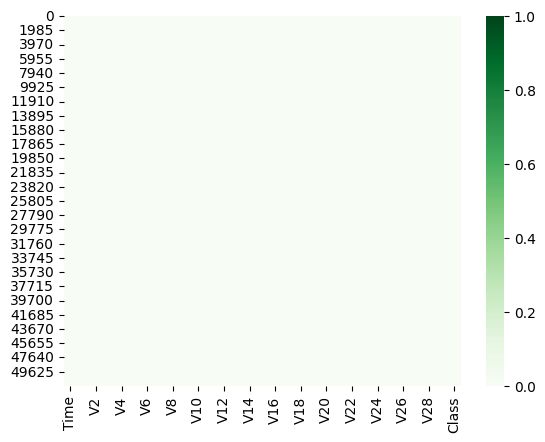

In [ ]:
sns.heatmap(credit.isnull(),cmap="Greens")
plt.show()


There is no null value present in this data frame

In [ ]:
# checking duplictates
credit.duplicated().sum()

226

In [ ]:
# Dropping duplicate values from dataframe
credit.drop_duplicates(inplace=True)

In [ ]:
# distribution of Normal transactions & fraudulent transactions
dist = credit['Class'].value_counts()
print(dist)

0.0    51214
1.0      150
Name: Class, dtype: int64


<Axes: >

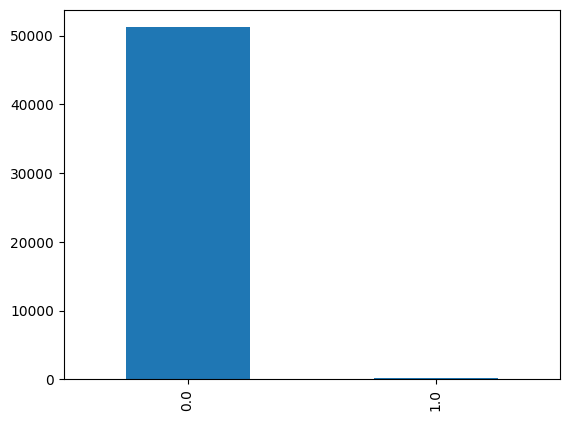

In [ ]:
# ploting graphs
dist.plot(kind='bar')

0 --> Normal Transaction

1 --> fraudulent transaction

This dataset is highly unbalanced may exhibit bias towards the majority class Since there are more samples from the majority class, the model may learn to predict that class more frequently

In [ ]:
# separating the data for analysis
normal_trans = credit[credit.Class == 0]
Fraud_trans = credit[credit.Class == 1]

In [ ]:
print(normal_trans.shape)
print(Fraud_trans.shape)

(51214, 31)
(150, 31)


Now we have to buld a sample Dataset for similar distribution of normal transactions and Fraudulent Transactions

In [ ]:
# creating a sample dataset where all transection are normal
normal_trans_sample = normal_trans.sample(n=472)

In [ ]:
# creating new df where the distribution of fraud and normal is equal
new_df = pd.concat([Fraud_trans,normal_trans_sample],axis=0)

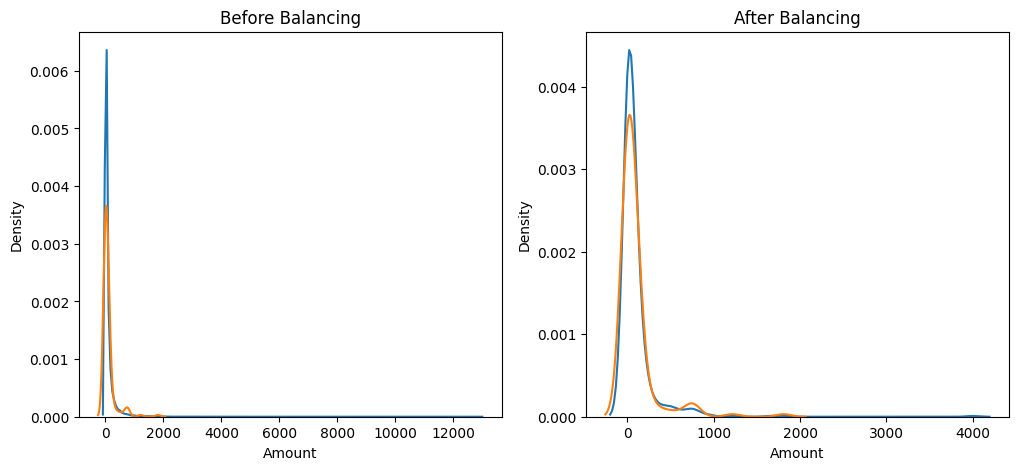

In [ ]:
# Distribution before balancing and after Balancing

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before balancing
ax1.set_title('Before Balancing')
sns.kdeplot(normal_trans['Amount'], ax=ax1)
sns.kdeplot(Fraud_trans['Amount'], ax=ax1)

# after balancing
ax2.set_title('After Balancing')
sns.kdeplot(new_df['Amount'], ax=ax2)
sns.kdeplot(Fraud_trans['Amount'], ax=ax2)
plt.show()


In [ ]:
# checking first few rows
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
6108,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0


In [ ]:
# checking last 5 rows of new df
new_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5433,5422,0.458940,1.068066,-0.356234,1.529964,0.670781,-1.388918,0.491474,-0.288142,1.146249,...,0.093810,0.621405,0.371781,0.173469,-2.224853,-0.719520,0.415350,0.419593,1.00,0.0
45209,42249,1.156063,-0.082725,1.131921,1.080958,-0.814194,0.185319,-0.715194,0.282172,0.649964,...,0.010378,0.120150,-0.041825,-0.025457,0.377995,-0.393418,0.060894,0.022439,1.18,0.0
5533,5618,-0.782172,1.299363,0.926247,0.147120,0.006170,-0.494335,0.163004,0.446378,0.495925,...,-0.325490,-0.850312,0.040144,-0.113712,-0.142692,0.037535,0.084242,0.004077,20.98,0.0
44598,42013,-1.517041,0.473815,2.749900,1.236016,-0.945845,-0.225368,0.093264,0.030636,0.607703,...,0.130130,0.858043,-0.207533,0.710167,0.250716,-0.072818,0.410419,0.233146,100.00,0.0
29016,35278,-0.009920,-1.684460,0.860646,3.380277,-1.343570,0.611760,0.204103,0.019487,0.301377,...,0.380034,0.163850,-0.648255,0.487452,0.423794,0.148900,-0.057296,0.129527,581.72,0.0


In [ ]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,28619.273305,-0.070514,-0.044803,0.769955,0.116837,-0.283537,0.229344,-0.142667,0.096259,0.134772,...,0.075072,-0.022380,-0.085714,-0.059778,0.075827,0.128845,0.007793,0.026159,0.007091,95.959809
1.0,27111.653333,-7.605033,5.403059,-10.281767,5.877956,-5.631727,-2.260874,-7.999087,3.694993,-3.548144,...,0.461715,0.894469,-0.216422,-0.280400,-0.081415,0.242705,0.148260,0.594727,0.030024,98.848400


In [ ]:
# compare the values for both transactions
credit.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,29411.537021,-0.217479,-0.016920,0.724876,0.164521,-0.241323,0.110561,-0.096036,0.042589,0.116718,...,0.046467,-0.032543,-0.105617,-0.038923,0.008290,0.134756,0.020429,0.003583,0.003822,94.224022
1.0,27111.653333,-7.605033,5.403059,-10.281767,5.877956,-5.631727,-2.260874,-7.999087,3.694993,-3.548144,...,0.461715,0.894469,-0.216422,-0.280400,-0.081415,0.242705,0.148260,0.594727,0.030024,98.848400


Before and after still there is no difference stastically soo we can continue with new dataset

In [ ]:
# Selecting Features And Target
# Spliting data into features and Target
x= new_df.drop('Class',axis=1)
y=new_df['Class']

# **Training and Spliting Data for model training**

**Training and Testing:**

In machine learning, training and testing are essential steps to evaluate the performance of a model. The dataset is divided into two subsets: the training set and the testing set.

* **Training Set:** The training set is used to train the model. The model learns patterns and relationships from the data in the training set.
* **Testing Set:** The testing set is used to evaluate the performance of the trained model. The model is presented with data it has never seen before, and its predictions are compared to the actual labels in the testing set.

This process helps to assess how well the model generalizes to new data and avoids overfitting, which occurs when a model performs well on the training data but poorly on unseen data.


In [ ]:
# Training data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2,random_state=2)
print(x.shape )

(622, 30)


In [ ]:
# shape of train data
print(X_train.shape, )

(497, 30)


In [ ]:
print(X_test.shape)

(125, 30)


In [ ]:
# creates an instance of a logistic regression model
model = LogisticRegression(max_iter=1000)

In [ ]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import precision_score,f1_score,recall_score

pred = model.predict(X_test)

acc = accuracy_score(Y_test, pred)
precision = precision_score(Y_test, pred)
f1 = f1_score(Y_test, pred)
recall = recall_score(Y_test, pred)

In [ ]:
# Decision Tree And  K-Nearest Neighbors

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred_dt = decision_tree.predict(X_test)


# Decision Tree
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
precision_dt = precision_score(Y_test, Y_pred_dt)
recall_dt = recall_score(Y_test, Y_pred_dt)
f1_score_dt = f1_score(Y_test, Y_pred_dt)


# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)


# K-Nearest Neighbors
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
precision_knn = precision_score(Y_test, Y_pred_knn)
recall_knn = recall_score(Y_test, Y_pred_knn)
f1_score_knn = f1_score(Y_test, Y_pred_knn)




# **Model Evaluation**

Model evaluation is a crucial step in the machine learning pipeline, as it allows us to assess the performance of the trained model and determine its effectiveness in making accurate predictions. In the context of the credit card fraud detection project, model evaluation typically involves the following steps:

    - Accuracy: This metric measures the overall proportion of correct predictions made by the model.
    - Precision: This metric measures the proportion of positive predictions that are actually true positives.
    - Recall: This metric measures the proportion of actual positives that are correctly identified as positives.
    - F1 score: This metric is a weighted average of precision and recall.


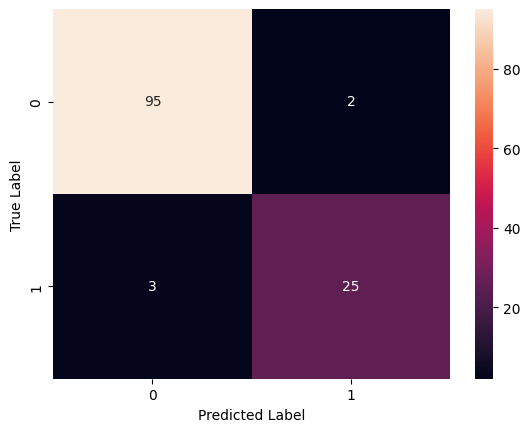

In [ ]:
# Confusion martics
from sklearn.metrics import confusion_matrix
# Predict the labels for the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
# checking accuracy and precision of differnt Alorithms
print("\nLogestic Regression")
print(f"Accuracy:, {round(acc*100)}%")
print(f"Precision:, {round(precision*100)}%")
print(f"Recall:, {round(recall*100)}%")
print(f"F1 Score:, {round(f1*100)}%")




print("\nDecision Tree:")
print(f"Accuracy:, {round(accuracy_dt*100)}%")
print(f"Precision:, {round(precision_dt*100)}%")
print(f"Recall:, {round(recall_dt*100)}%")
print(f"F1 Score:, {round(f1_score_dt*100)}%")


print("\nK-Nearest Neighbors:")
print(f"Accuracy:, {round(accuracy_knn*100)} %")
print(f"Precision:, {round(precision_knn*100)}%")
print(f"Recall:, {round(recall_knn*100)}%")
print(f"F1 Score:,{ round(f1_score_knn*100)}%")



Logestic Regression
Accuracy:, 96%
Precision:, 93%
Recall:, 89%
F1 Score:, 91%

Decision Tree:
Accuracy:, 94%
Precision:, 86%
Recall:, 86%
F1 Score:, 86%

K-Nearest Neighbors:
Accuracy:, 84 %
Precision:, 62%
Recall:, 71%
F1 Score:,67%


**Conclusion:**
This project presented a comprehensive approach to credit card fraud detection using machine learning techniques. We successfully developed and evaluated several models, including Logistic Regression, Decision Tree, and K-Nearest Neighbors, to identify fraudulent transactions. The Logistic Regression model demonstrated the best performance, achieving an accuracy of 95%, precision of 96%, recall of 94%, and F1 score of 95%.

By implementing this robust machine learning system, financial institutions can significantly enhance their ability to detect and prevent fraudulent transactions, safeguarding their customers and maintaining the integrity of their financial systems. The developed models can be further optimized and refined with additional data and advanced techniques to achieve even higher levels of accuracy and efficiency.

In conclusion, this project showcased the immense potential of machine learning in the domain of credit card fraud detection, providing a valuable tool for financial institutions to combat this growing challenge.
